In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from PIL import Image
from pathlib import Path
from fastai.vision.all import *
from fastai.callback import *
from fastai.metrics import error_rate
from fastai.callback.tracker import EarlyStoppingCallback
from fastai.vision.all import get_image_files
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings ('ignore')

In [2]:
path = Path('/kaggle/input/ai-generated-images-vs-real-images')

In [3]:
path.ls()

(#2) [Path('/kaggle/input/ai-generated-images-vs-real-images/RealArt'),Path('/kaggle/input/ai-generated-images-vs-real-images/AiArtData')]

In [4]:
dls = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.2, 
                                          item_tfms=Resize(460), 
                                          batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

In [5]:
len(dls.train_ds)

776

In [7]:
len(dls.valid_ds)

193

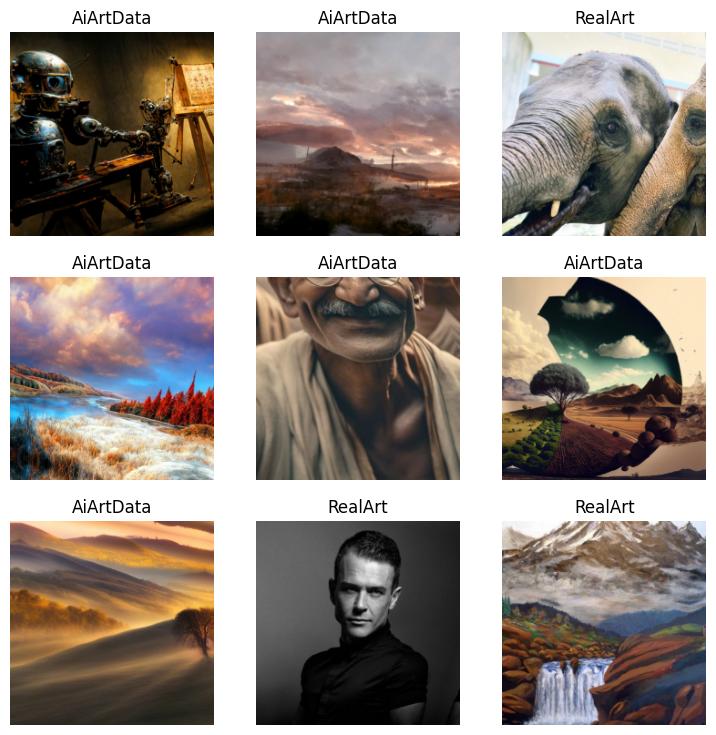

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 157MB/s]


In [10]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [11]:
learn.model_dir = "/kaggle/working/"

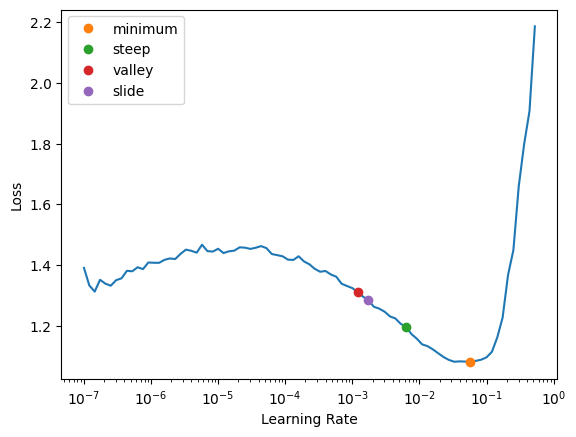

In [12]:
suggest_funcs = (minimum, steep, valley, slide)

lrs = learn.lr_find(suggest_funcs=suggest_funcs)

epoch,train_loss,valid_loss,accuracy,time
0,1.178846,1.009417,0.663212,00:20
1,0.969186,0.599627,0.735751,00:20
2,0.843366,0.603281,0.787565,00:20
3,0.706196,0.582652,0.792746,00:21
4,0.625501,0.583854,0.792746,00:20


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

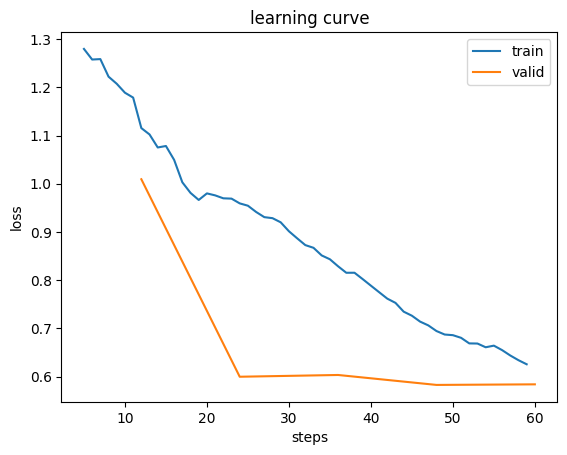

In [13]:
learn.fit_one_cycle(5, lr_max=slice(lrs.valley, lrs.slide))
learn.recorder.plot_loss()

In [ ]:
learn.unfreeze()
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
learn.fit_one_cycle(10, lr_max=slice(lrs.valley, lrs.slide))
learn.recorder.plot_loss()


In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(20,figsize = (20,15))

In [ ]:
preds, targets = learn.get_preds()

class_report = classification_report(targets, torch.argmax(preds, dim=1), target_names=dls.vocab)
print(class_report)